## 선형 회귀 모델 학습 및 성능 평가 

##### 학습/평가 데이터 분리

In [ ]:
# 측정 데이터와 레이블(정답) 분리
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1:].values
y = np.where(y =='OK',1,0)
y = y.ravel() # 레이블을 1차원으로 변경함.
print(X.shape, y.shape)

(9383, 4) (9383,)


In [ ]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

5586
982
2382
433


In [ ]:
new_y_train = y_train[y_train == 1][:len(y_train[y_train == 0])]
new_y_train = np.concatenate([new_y_train, y_train[y_train == 0]])
new_y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
new_X_train = X_train[y_train == 1][:len(y_train[y_train == 0])]
new_X_train = np.concatenate([new_X_train, X_train[y_train == 0]])
new_X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  0.,   0., 581., 580.],
       [  1.,   1., 521., 303.],
       [  0.,   0., 558., 573.]])

#####  모델 성능 평가 - 1) 분류성능평가지표

> 정량평가: 오차행렬, 정확도, 정밀도, 재현율, F1 score, AUC 살펴보기

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [ ]:
def get_clf_eval(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f}, AUC:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))

> 정성평가: 그래프 살펴보기

In [ ]:
import matplotlib.pyplot as plt
def draw_graph(y_test=None, pred=None):
  plt.figure(figsize=(40, 9))
  plt.plot(y_test, 'b', label = 'actual')
  plt.plot(pred, 'r', label = 'prediction')
  plt.legend()
  plt.show()

  # 따로 보기
  # plt.figure(figsize = (30,6)) # Plotting
  # plt.plot(y_test, 'b', label = 'actual')
  # plt.legend()
  # plt.show()
  # plt.figure(figsize=(30, 6))
  # plt.plot(pred, 'r', label = 'prediction')
  # plt.legend()
  # plt.show()

##### 모델 성능 평가 -2) ROC curve와 case별로 살펴보기 

In [ ]:
def get_eval_2(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  TN = confusion[0][0]
  FP = confusion[0][1]
  FN = confusion[1][0]
  TP = confusion[1][1]
  print("📌실제 불량일 때 불량으로 판별할 확률\n= P(실제불량)∩P(에측불량)/P(실제불량): {:.4f}".format(TN/(TN+FP)))
  #print("📌실제 불량일 때 양품으로 판별할 확률\n= P(실제불량)∩P(에측양품)/P(실제불량): {:.4f}".format(FP/(TN+FP)))
  #print("📌실제 양품일 때 불량으로 판별할 확률\n= P(실제양품)∩P(에측불량)/P(실제양품): {:.4f}".format(FN/(FN+TP)))
  print("📌실제 양품일 때 양품으로 판별할 확률\n= P(실제양품)∩P(에측양품)/P(실제양품): {:.4f}".format(TP/(FN+TP)))

  roc_auc = roc_auc_score(y_test, pred)
  print('ROC_AUC:{:.4f}'.format(roc_auc))
  return(TN/(TN+FP),TP/(FN+TP),roc_auc)

##### 2-1. 선형 회귀

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

    
model = LinearRegression().fit(X_train, y_train)
NN = model.predict(X_test).flatten()

In [ ]:
NN_prediction = np.array([])
threshold = 0.75
for i in NN:
  if i>= threshold:
    NN_prediction = np.append(NN_prediction, np.array([1]))
  else:
    NN_prediction = np.append(NN_prediction, np.array([0]))
get_clf_eval(y_test, NN_prediction)
get_eval_2(y_test, NN_prediction)

오차 행렬
[[ 140  293]
 [  49 2333]]
정확도:  0.8785, 정밀도:  0.8884, 재현율:  0.9794, F1:  0.9317, AUC: 0.6514
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.3233
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9794
ROC_AUC:0.6514


(0.3233256351039261, 0.9794290512174643, 0.6513773431606951)

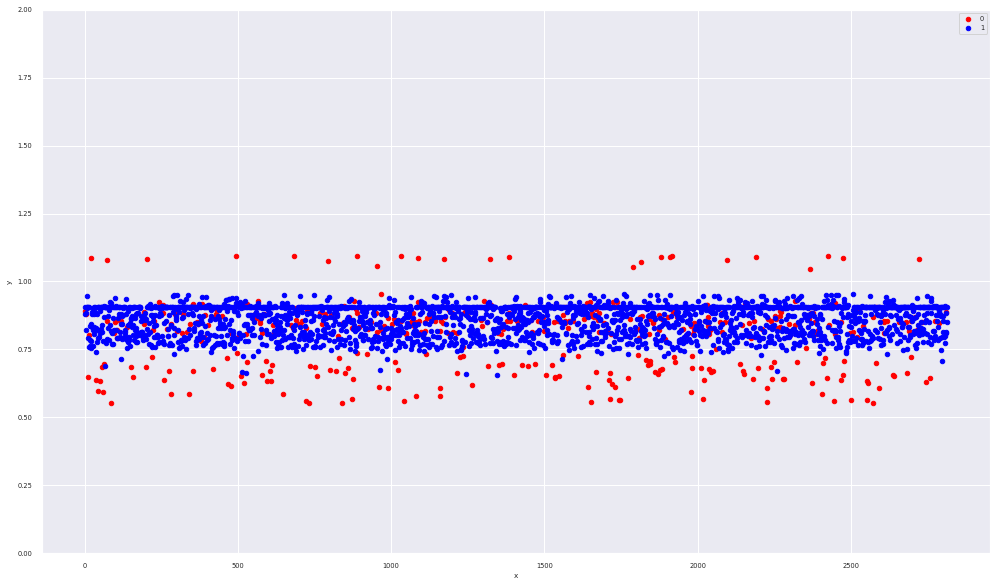

In [ ]:
data = pd.DataFrame({'x': range(0, len(X_test)), 
                     'y': NN, 
                     'group':y_test})

fig,ax = plt.subplots(figsize=(17,10))
colors = ['red', 'blue']
for i, (name, group) in enumerate(data.groupby('group')):
  group.plot(ax=ax,
             kind = 'scatter',
             x='x',
             y='y',
             color = colors[i],
             ylim = (0,2),
             label = name)


가설: 만약,  훈련 데이터셋에서 불량, 정상 데이터가 1:1로 들어 있으면 학습이 더 잘 될 것이다.


In [ ]:
unique, counts = np.unique(y_train, return_counts = True)
print(counts)


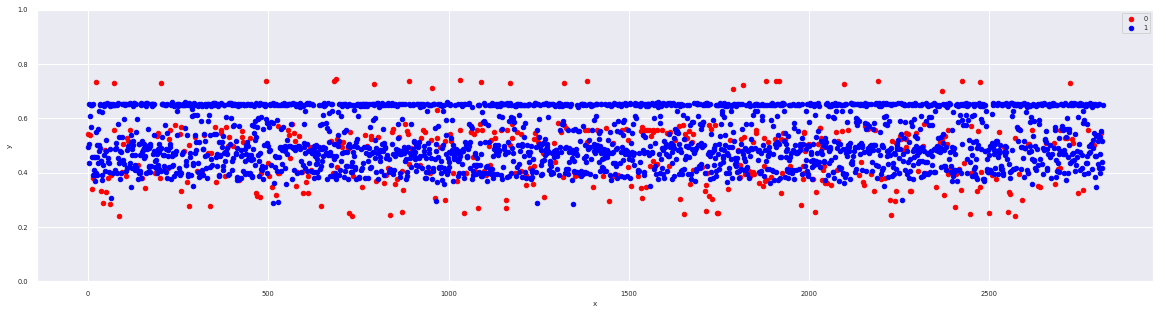

In [ ]:
model = LinearRegression().fit(new_X_train, new_y_train)
NN = model.predict(X_test).flatten()
data = pd.DataFrame({'x': range(0, len(X_test)), 
                     'y': NN, 
                     'group':y_test})

fig,ax = plt.subplots(figsize=(20,5))
colors = ['red', 'blue']
for i, (name, group) in enumerate(data.groupby('group')):
  group.plot(ax=ax,
             kind = 'scatter',
             x='x',
             y='y',
             color = colors[i],
             ylim = (0,1),
             label = name)

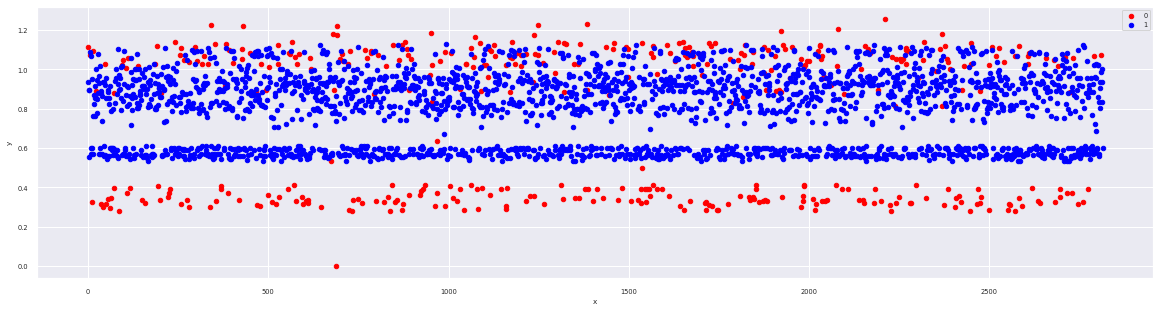

In [ ]:
model = LinearRegression(fit_intercept = False, n_jobs=20).fit(X_train, y_train) 
NN = model.predict(X_test).flatten()
data = pd.DataFrame({'x': range(0, len(X_test)), 
                     'y': NN, 
                     'group':y_test})

fig,ax = plt.subplots(figsize=(20,5))
colors = ['red', 'blue']
for i, (name, group) in enumerate(data.groupby('group')):
  group.plot(ax=ax,
             kind = 'scatter',
             x='x',
             y='y',
             color = colors[i],
             label = name)

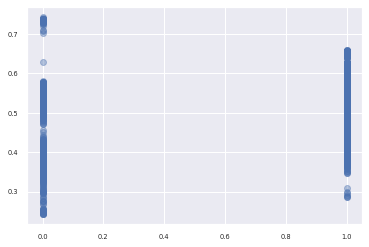

In [ ]:
model = LinearRegression().fit(new_X_train, new_y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.4)